In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (16, 8)

In [4]:
cd ../..

/home/ben/masterphase/Mastercode


In [5]:
from helper.helper import nn_exclude_training
from Ising.Data import IsingData
data = IsingData("Ising/16x16_240temp_1000each/")

Loading data from precreated .npz


In [4]:
# generate needed intervals
x = 1.2+0.1*np.arange(22)
x, y = np.meshgrid(x,x)
intervals = [(x, y) for x, y in zip(x.flatten(), y.flatten())]
intervals_small = [(start, end) for end, start in intervals if end > start]
intervals_small=np.array(intervals_small)

In [5]:
presults, nns = nn_exclude_training(data.train_data, 
                                  nn="Paper", 
                                  exclude=intervals_small, 
                                  keepNN=False, 
                                  save_results_single="exclude_data_huge_PNN",
                                  n_epochs=4)

Tue Dec 12 18:15:59 2017 Excluding data in [1.2, 1.3] (1/231)
Tue Dec 12 18:16:00 2017 Training
Training 4 epochs took 16.596s
Accuracy is 0.949999988079071
Tue Dec 12 18:16:18 2017 Excluding data in [1.2, 1.4] (2/231)
Tue Dec 12 18:16:19 2017 Training
Training 4 epochs took 15.115s
Accuracy is 0.9300000071525574
Tue Dec 12 18:16:35 2017 Excluding data in [1.2, 1.5] (3/231)
Tue Dec 12 18:16:36 2017 Training
Training 4 epochs took 15.401s
Accuracy is 0.9200000166893005
Tue Dec 12 18:16:53 2017 Excluding data in [1.2, 1.6] (4/231)
Tue Dec 12 18:16:53 2017 Training
Training 4 epochs took 14.889s
Accuracy is 0.949999988079071
Tue Dec 12 18:17:10 2017 Excluding data in [1.2, 1.7] (5/231)
Tue Dec 12 18:17:10 2017 Training
Training 4 epochs took 13.855s
Accuracy is 0.9300000071525574
Tue Dec 12 18:17:26 2017 Excluding data in [1.2, 1.8] (6/231)
Tue Dec 12 18:17:26 2017 Training
Training 4 epochs took 17.432s
Accuracy is 0.7400000095367432
Tue Dec 12 18:17:45 2017 Excluding data in [1.2, 1.9] 

In [5]:
presults, nns = nn_exclude_training(data.train_data, 
                                  nn="Conv", 
                                  exclude=intervals_small, 
                                  keepNN=False, 
                                  save_results_single="exclude_data_huge_CNN",
                                  n_epochs=4)

Tue Dec 12 22:08:17 2017 Excluding data in [1.2, 1.3] (1/231)
Tue Dec 12 22:08:18 2017 Training
Training 4 epochs took 15.843s
Accuracy is 0.5
Tue Dec 12 22:08:36 2017 Excluding data in [1.2, 1.4] (2/231)
Tue Dec 12 22:08:36 2017 Training
Training 4 epochs took 13.219s
Accuracy is 0.5
Tue Dec 12 22:08:51 2017 Excluding data in [1.2, 1.5] (3/231)
Tue Dec 12 22:08:51 2017 Training
Training 4 epochs took 12.737s
Accuracy is 0.5
Tue Dec 12 22:09:05 2017 Excluding data in [1.2, 1.6] (4/231)
Tue Dec 12 22:09:06 2017 Training
Training 4 epochs took 12.204s
Accuracy is 0.5
Tue Dec 12 22:09:19 2017 Excluding data in [1.2, 1.7] (5/231)
Tue Dec 12 22:09:20 2017 Training
Training 4 epochs took 11.918s
Accuracy is 0.5
Tue Dec 12 22:09:33 2017 Excluding data in [1.2, 1.8] (6/231)
Tue Dec 12 22:09:33 2017 Training
Training 4 epochs took 10.838s
Accuracy is 0.5
Tue Dec 12 22:09:46 2017 Excluding data in [1.2, 1.9] (7/231)
Tue Dec 12 22:09:46 2017 Training
Training 4 epochs took 10.347s
Accuracy is 0.5

#### Single training (for debug only)

In [7]:
from NN.PaperNN import PaperNN
n = PaperNN(256)
n.train(data.train_data[0], data.train_data[1],
        learning_rate=5e-5, epochs=2,
        valid_data=data.test_data[0], 
        valid_labels=data.test_data[1], progress_update=1)

InternalError: Blas GEMM launch failed : a.shape=(120, 256), b.shape=(256, 384), m=120, n=384, k=256
	 [[Node: MatMul_2 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_Placeholder_2_0_0/_1, Variable_4/read)]]

Caused by op 'MatMul_2', defined at:
  File "/home/ben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ben/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ben/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ben/.local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/ben/.local/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/ben/.local/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/ben/.local/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ben/.local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/ben/.local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ben/.local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/ben/.local/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ben/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ben/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ben/.local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ben/.local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ben/.local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ben/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ben/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ben/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-4e21d73ac186>", line 2, in <module>
    n = PaperNN(256)
  File "/home/ben/masterphase/Mastercode/NN/BaseNN.py", line 17, in __init__
    self._build_model()
  File "/home/ben/masterphase/Mastercode/NN/PaperNN.py", line 28, in _build_model
    h = tf.nn.relu(tf.matmul(x, W1) + b1)
  File "/home/ben/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 2022, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/ben/.local/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2516, in _mat_mul
    name=name)
  File "/home/ben/.local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/ben/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/home/ben/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(120, 256), b.shape=(256, 384), m=120, n=384, k=256
	 [[Node: MatMul_2 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_Placeholder_2_0_0/_1, Variable_4/read)]]


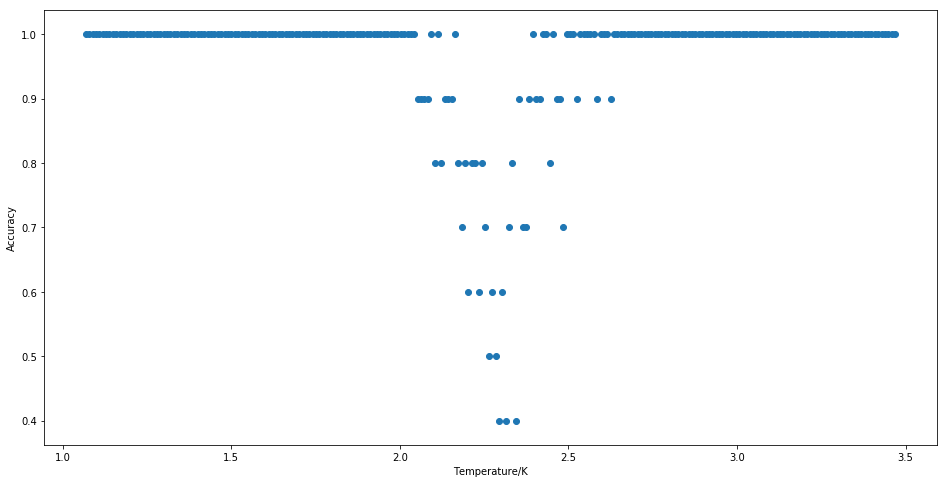

In [11]:
select_slice = slice(0,-1,10)
test_data = tuple([t[select_slice] for t in data.test_data])
t, a, r0,r1 = n.evaluate_T_dependence(test_data, plot=True)

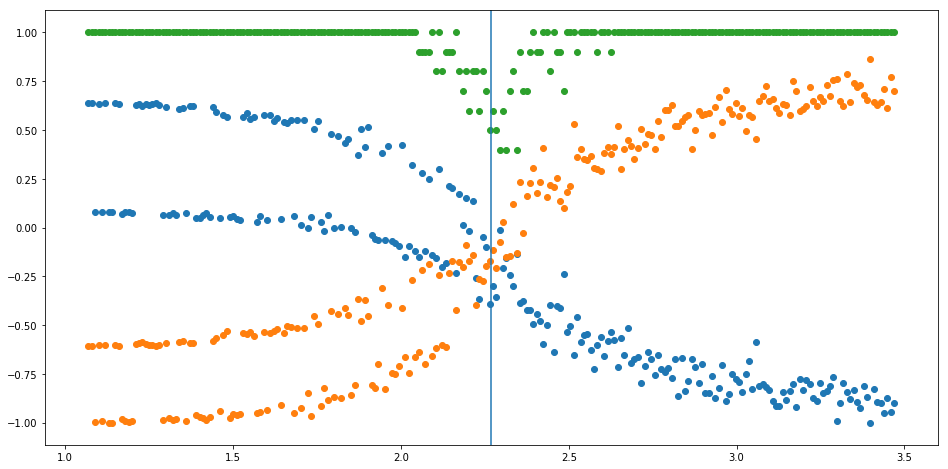

In [13]:
plt.scatter(t, r0/np.max(abs(r0)))
plt.scatter(t, r1/np.max(abs(r1)))
plt.scatter(t, a)
plt.axvline(2.269)